我们用随机森林以及之前讲过的 SVM、决策树和 KNN 分类器对信用卡违约数据进行了分析，这节课我们来研究下信用卡欺诈。

相比于信用卡违约的比例，信用卡欺诈的比例更小，但是危害极大。如何通过以往的交易数据分析出每笔交易是否正常，是否存在盗刷风险是我们这次项目的目标。

通过今天的学习，你需要掌握以下几个方面：

1、了解逻辑回归分类，以及如何在 sklearn 中使用它；

2、信用卡欺诈属于二分类问题，欺诈交易在所有交易中的比例很小，对于这种数据不平衡的情况，到底采用什么样的模型评估标准会更准确；

3、完成信用卡欺诈分析的实战项目，并通过数据可视化对数据探索和模型结果评估进一步加强了解。

**构建逻辑回归分类器**

逻辑回归虽然不在我们讲解的十大经典数据挖掘算法里面，但也是常用的数据挖掘算法。

逻辑回归，也叫作 logistic 回归。虽然名字中带有“回归”，但它实际上是分类方法，主要解决的是二分类问题，当然它也可以解决多分类问题，只是二分类更常见一些。

在逻辑回归中使用了 Logistic 函数，也称为 Sigmoid 函数。Sigmoid 函数是在深度学习中经常用到的函数之一，函数公式为：

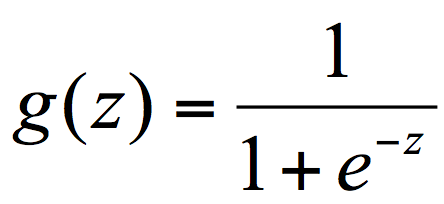

函数的图形如下所示，类似 S 状：

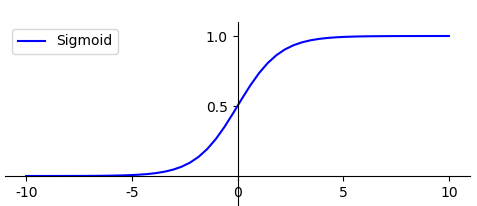

你能看出 g(z) 的结果在 0-1 之间，当 z 越大的时候，g(z) 越大，当 z 趋近于无穷大的时候，g(z) 趋近于 1。同样当 z 趋近于无穷小的时候，g(z) 趋近于 0。同时，函数值以 0.5 为中心。

为什么逻辑回归算法是基于 Sigmoid 函数实现的呢？你可以这样理解：我们要实现一个二分类任务，0 即为不发生，1 即为发生。我们给定一些历史数据 X 和 y。其中 X 代表样本的 n 个特征，y 代表正例和负例，也就是 0 或 1 的取值。通过历史样本的学习，我们可以得到一个模型，当给定新的 X 的时候，可以预测出 y。这里我们得到的 y 是一个预测的概率，通常不是 0% 和 100%，而是中间的取值，那么我们就可以认为概率大于 50% 的时候，即为发生（正例），概率小于 50% 的时候，即为不发生（负例）。这样就完成了二分类的预测。

逻辑回归模型的求解这里不做介绍，我们来看下如何使用 sklearn 中的逻辑回归工具。在 sklearn 中，我们使用 LogisticRegression() 函数构建逻辑回归分类器，函数里有一些常用的构造参数：

1、penalty：惩罚项，取值为 l1 或 l2，默认为 l2。当模型参数满足高斯分布的时候，使用 l2，当模型参数满足拉普拉斯分布的时候，使用 l1；

2、solver：代表的是逻辑回归损失函数的优化方法。有 5 个参数可选，分别为 liblinear、lbfgs、newton-cg、sag 和 saga。默认为 liblinear，适用于数据量小的数据集，当数据量大的时候可以选用 sag 或 saga 方法。

3、max_iter：算法收敛的最大迭代次数，默认为 10。

4、n_jobs：拟合和预测的时候 CPU 的核数，默认是 1，也可以是整数，如果是 -1 则代表 CPU 的核数。

当我们创建好之后，就可以使用 fit 函数拟合，使用 predict 函数预测。

**模型评估指标**

我们之前对模型做评估时，通常采用的是准确率 (accuracy)，它指的是分类器正确分类的样本数与总体样本数之间的比例。这个指标对大部分的分类情况是有效的，不过当分类结果严重不平衡的时候，准确率很难反应模型的好坏。

举个例子，对于机场安检中恐怖分子的判断，就不能采用准确率对模型进行评估。我们知道恐怖分子的比例是极低的，因此当我们用准确率做判断时，如果准确率高达 99.999%，就说明这个模型一定好么？

其实正因为现实生活中恐怖分子的比例极低，就算我们不能识别出一个恐怖分子，也会得到非常高的准确率。因为准确率的评判标准是正确分类的样本个数与总样本数之间的比例。因此非恐怖分子的比例会很高，就算我们识别不出来恐怖分子，正确分类的个数占总样本的比例也会很高，也就是准确率高。

实际上我们应该更关注恐怖分子的识别，这里先介绍下数据预测的四种情况：TP、FP、TN、FN。我们用第二个字母 P 或 N 代表预测为正例还是负例，P 为正，N 为负。第一个字母 T 或 F 代表的是预测结果是否正确，T 为正确，F 为错误。

所以四种情况分别为：

1、TP：预测为正，判断正确；

2、FP：预测为正，判断错误；

3、TN：预测为负，判断正确；

4、FN：预测为负，判断错误。

我们知道样本总数 =TP+FP+TN+FN，预测正确的样本数为 TP+TN，因此准确率 Accuracy = (TP+TN)/(TP+TN+FN+FP)。

实际上，对于分类不平衡的情况，有两个指标非常重要，它们分别是精确度和召回率。

精确率 P = TP/ (TP+FP)，对应上面恐怖分子这个例子，在所有判断为恐怖分子的人数中，真正是恐怖分子的比例。

召回率 R = TP/ (TP+FN)，也称为查全率。代表的是恐怖分子被正确识别出来的个数与恐怖分子总数的比例。

为什么要统计召回率和精确率这两个指标呢？假设我们只统计召回率，当召回率等于 100% 的时候，模型是否真的好呢？

举个例子，假设我们把机场所有的人都认为是恐怖分子，恐怖分子都会被正确识别，这个数字与恐怖分子的总数比例等于 100%，但是这个结果是没有意义的。如果我们认为机场里所有人都是恐怖分子的话，那么非恐怖分子（极高比例）都会认为是恐怖分子，误判率太高了，所以我们还需要统计精确率作为召回率的补充。

实际上有一个指标综合了精确率和召回率，可以更好地评估模型的好坏。这个指标叫做 F1，用公式表示为：

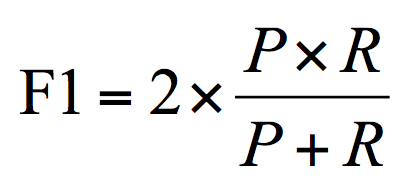

F1 作为精确率 P 和召回率 R 的调和平均，数值越大代表模型的结果越好。

**对信用卡违约率进行分析**

我们来看一个信用卡欺诈分析的项目，这个数据集你可以从百度网盘（因为数据集大于 100M，所以采用了网盘）中下载：

```链接：https://pan.baidu.com/s/14F8WuX0ZJntdB_r1EC08HA 提取码：58gp```

数据集包括了 2013 年 9 月份两天时间内的信用卡交易数据，284807 笔交易中，一共有 492 笔是欺诈行为。输入数据一共包括了 28 个特征 V1，V2，……V28 对应的取值，以及交易时间 Time 和交易金额 Amount。为了保护数据隐私，我们不知道 V1 到 V28 这些特征代表的具体含义，只知道这 28 个特征值是通过 PCA 变换得到的结果。另外字段 Class 代表该笔交易的分类，Class=0 为正常（非欺诈），Class=1 代表欺诈。

我们的目标是针对这个数据集构建一个信用卡欺诈分析的分类器，采用的是逻辑回归。从数据中你能看到欺诈行为只占到了 492/284807=0.172%，数据分类结果的分布是非常不平衡的，因此我们不能使用准确率评估模型的好坏，而是需要统计 F1 值（综合精确率和召回率）。我们先梳理下整个项目的流程：

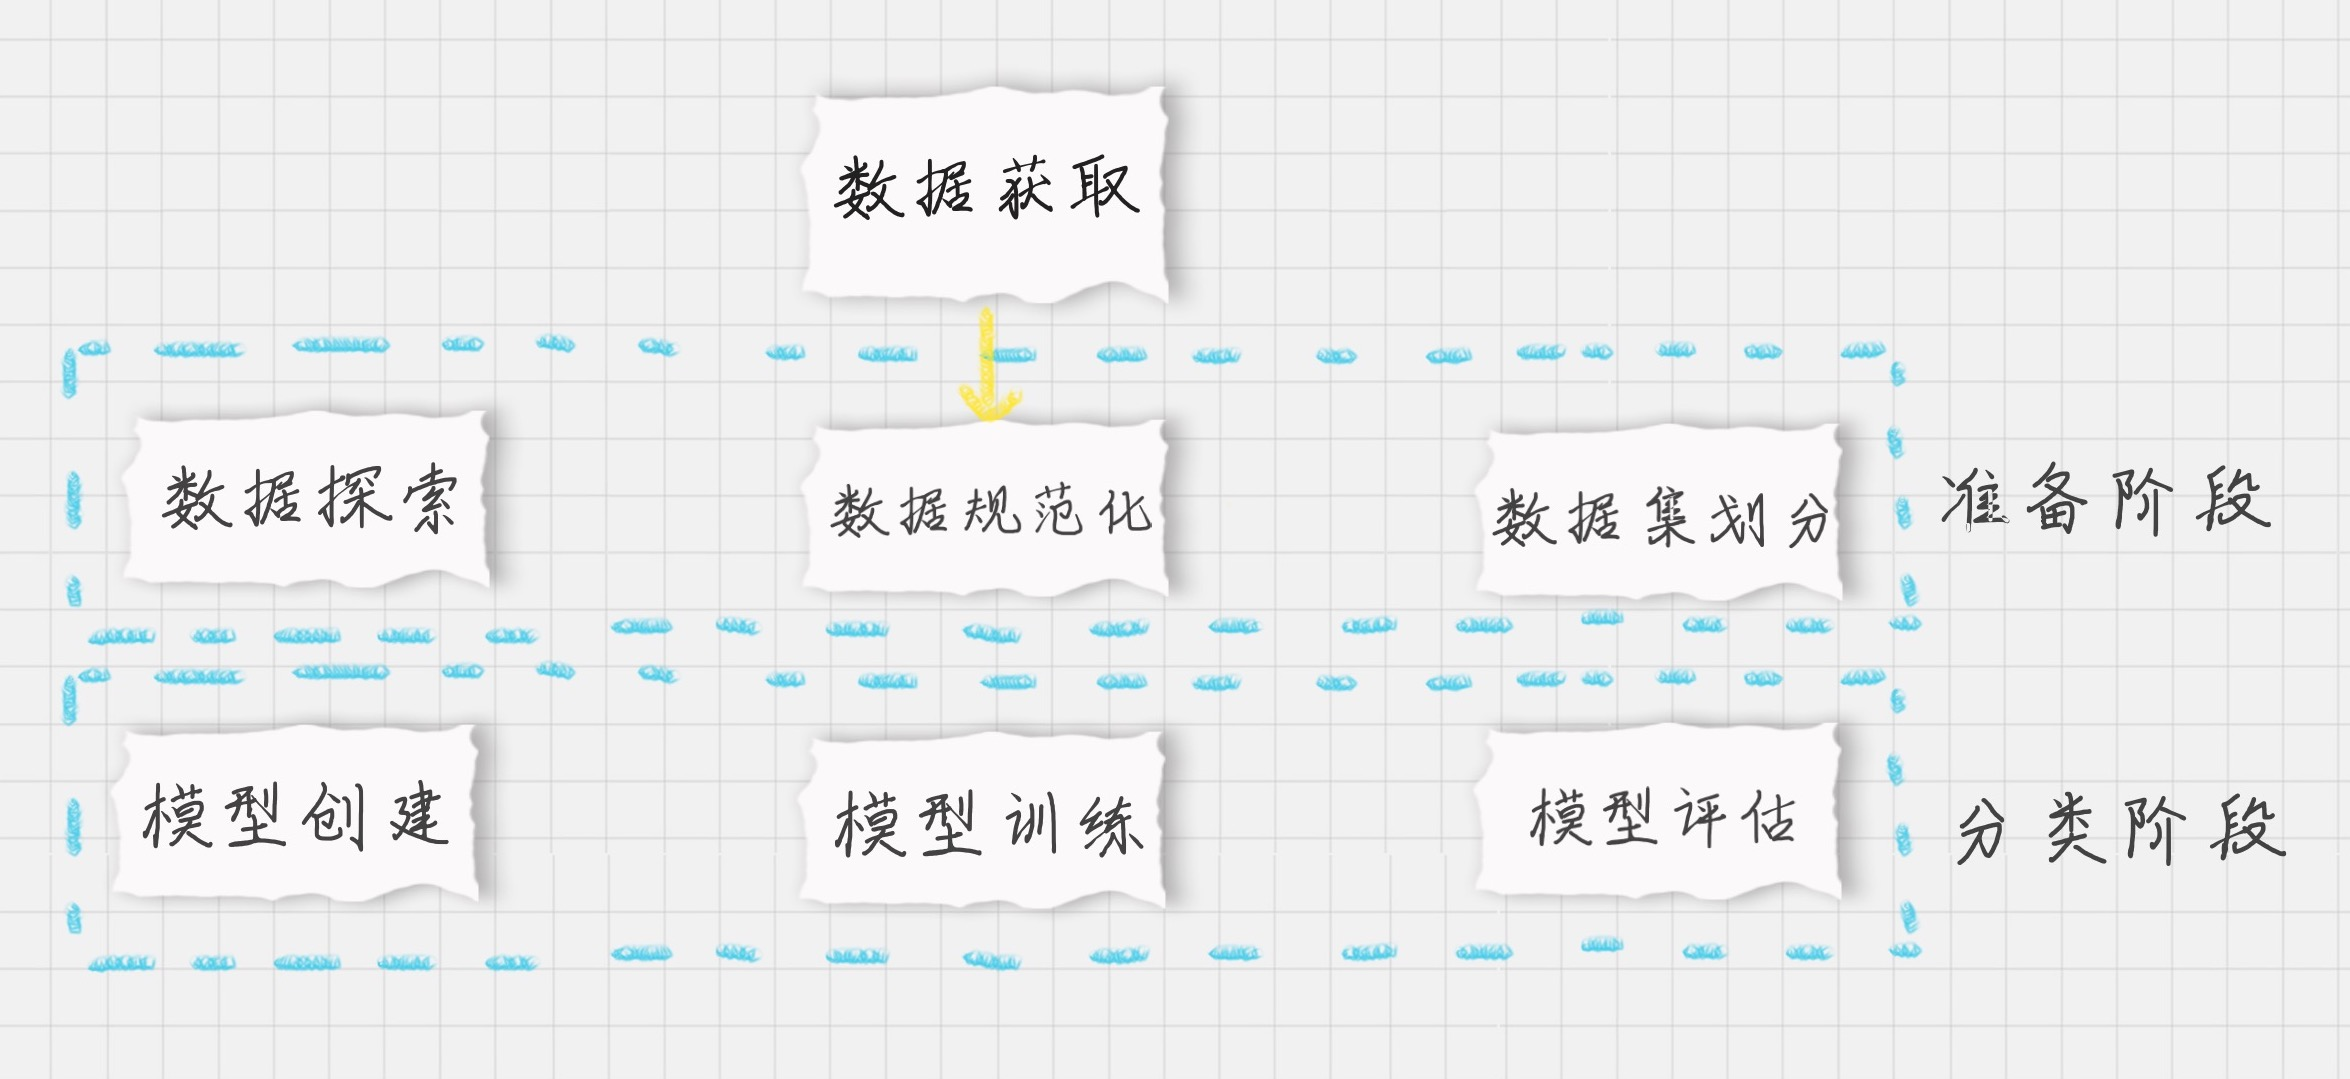

1、加载数据；

2、准备阶段：我们需要探索数据，用数据可视化的方式查看分类结果的情况，以及随着时间的变化，欺诈交易和正常交易的分布情况。上面已经提到过，V1-V28 的特征值都经过 PCA 的变换，但是其余的两个字段，Time 和 Amount 还需要进行规范化。Time 字段和交易本身是否为欺诈交易无关，因此我们不作为特征选择，只需要对 Amount 做数据规范化就行了。同时数据集没有专门的测试集，使用 train_test_split 对数据集进行划分；

3、分类阶段：我们需要创建逻辑回归分类器，然后传入训练集数据进行训练，并传入测试集预测结果，将预测结果与测试集的结果进行比对。这里的模型评估指标用到了精确率、召回率和 F1 值。同时我们将精确率 - 召回率进行了可视化呈现。

基于上面的流程，具体代码如下：

In [ ]:
# -*- coding:utf-8 -*-
# 使用逻辑回归对信用卡欺诈进行分类
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
 
# 混淆矩阵可视化
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix"', cmap = plt.cm.Blues) :
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
 
# 显示模型评估结果
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('精确率: {:.3f}'.format(tp/(tp+fp)))
    print('召回率: {:.3f}'.format(tp/(tp+fn)))
    print('F1值: {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))))
# 绘制精确率-召回率曲线
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('召回率')
    plt.ylabel('精确率')
    plt.title('精确率-召回率 曲线')
    plt.show();
 
# 数据加载
data = pd.read_csv('./creditcard.csv')
# 数据探索
print(data.describe())
# 设置plt正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 绘制类别分布
plt.figure()
ax = sns.countplot(x = 'Class', data = data)
plt.title('类别分布')
plt.show()
# 显示交易笔数，欺诈交易笔数
num = len(data)
num_fraud = len(data[data['Class']==1]) 
print('总交易笔数: ', num)
print('诈骗交易笔数：', num_fraud)
print('诈骗交易比例：{:.6f}'.format(num_fraud/num))
# 欺诈和正常交易可视化
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))
bins = 50
ax1.hist(data.Time[data.Class == 1], bins = bins, color = 'deeppink')
ax1.set_title('诈骗交易')
ax2.hist(data.Time[data.Class == 0], bins = bins, color = 'deepskyblue')
ax2.set_title('正常交易')
plt.xlabel('时间')
plt.ylabel('交易次数')
plt.show()
# 对Amount进行数据规范化
data['Amount_Norm'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
# 特征选择
y = np.array(data.Class.tolist())
data = data.drop(['Time','Amount','Class'],axis=1)
X = np.array(data.as_matrix())
# 准备训练集和测试集
train_x, test_x, train_y, test_y = train_test_split (X, y, test_size = 0.1, random_state = 33)
 
# 逻辑回归分类
clf = LogisticRegression()
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
# 预测样本的置信分数
score_y = clf.decision_function(test_x)  
# 计算混淆矩阵，并显示
cm = confusion_matrix(test_y, predict_y)
class_names = [0,1]
# 显示混淆矩阵
plot_confusion_matrix(cm, classes = class_names, title = '逻辑回归 混淆矩阵')
# 显示模型评估分数
show_metrics()
# 计算精确率，召回率，阈值用于可视化
precision, recall, thresholds = precision_recall_curve(test_y, score_y)
plot_precision_recall()


你能看出来欺诈交易的笔数为 492 笔，占所有交易的比例是很低的，即 0.001727，我们可以通过数据可视化的方式对欺诈交易和正常交易的分布进行呈现。另外通过可视化，我们也能看出精确率和召回率之间的关系，当精确率高的时候，召回率往往很低，召回率高的时候，精确率会比较低。

代码有一些模块需要说明下。

我定义了 plot_confusion_matrix 函数对混淆矩阵进行可视化。什么是混淆矩阵呢？混淆矩阵也叫误差矩阵，实际上它就是 TP、FP、TN、FN 这四个数值的矩阵表示，帮助我们判断预测值和实际值相比，对了多少。从这个例子中，你能看出 TP=37，FP=7，FN=23。所以精确率 P=TP/(TP+FP)=37/(37+7)=0.841，召回率 R=TP/(TP+FN)=37/(37+23)=0.617。

然后使用了 sklearn 中的 precision_recall_curve 函数，通过预测值和真实值来计算精确率 - 召回率曲线。precision_recall_curve 函数会计算在不同概率阈值情况下的精确率和召回率。最后定义 plot_precision_recall 函数，绘制曲线。

**总结**

今天我给你讲了逻辑回归的概念和相关工具的使用，另外学习了在数据样本不平衡的情况下，如何评估模型。这里你需要了解精确率，召回率和 F1 的概念和计算方式。最后在信用卡欺诈分析的项目中，我们使用了逻辑回归工具，并对混淆矩阵进行了计算，同时在模型结果评估中，使用了精确率、召回率和 F1 值，最后得到精确率 - 召回率曲线的可视化结果。

从这个项目中你能看出来，不是所有的分类都是样本平衡的情况，针对正例比例极低的情况，比如信用卡欺诈、某些疾病的识别，或者是恐怖分子的判断等，都需要采用精确率 - 召回率来进行统计。

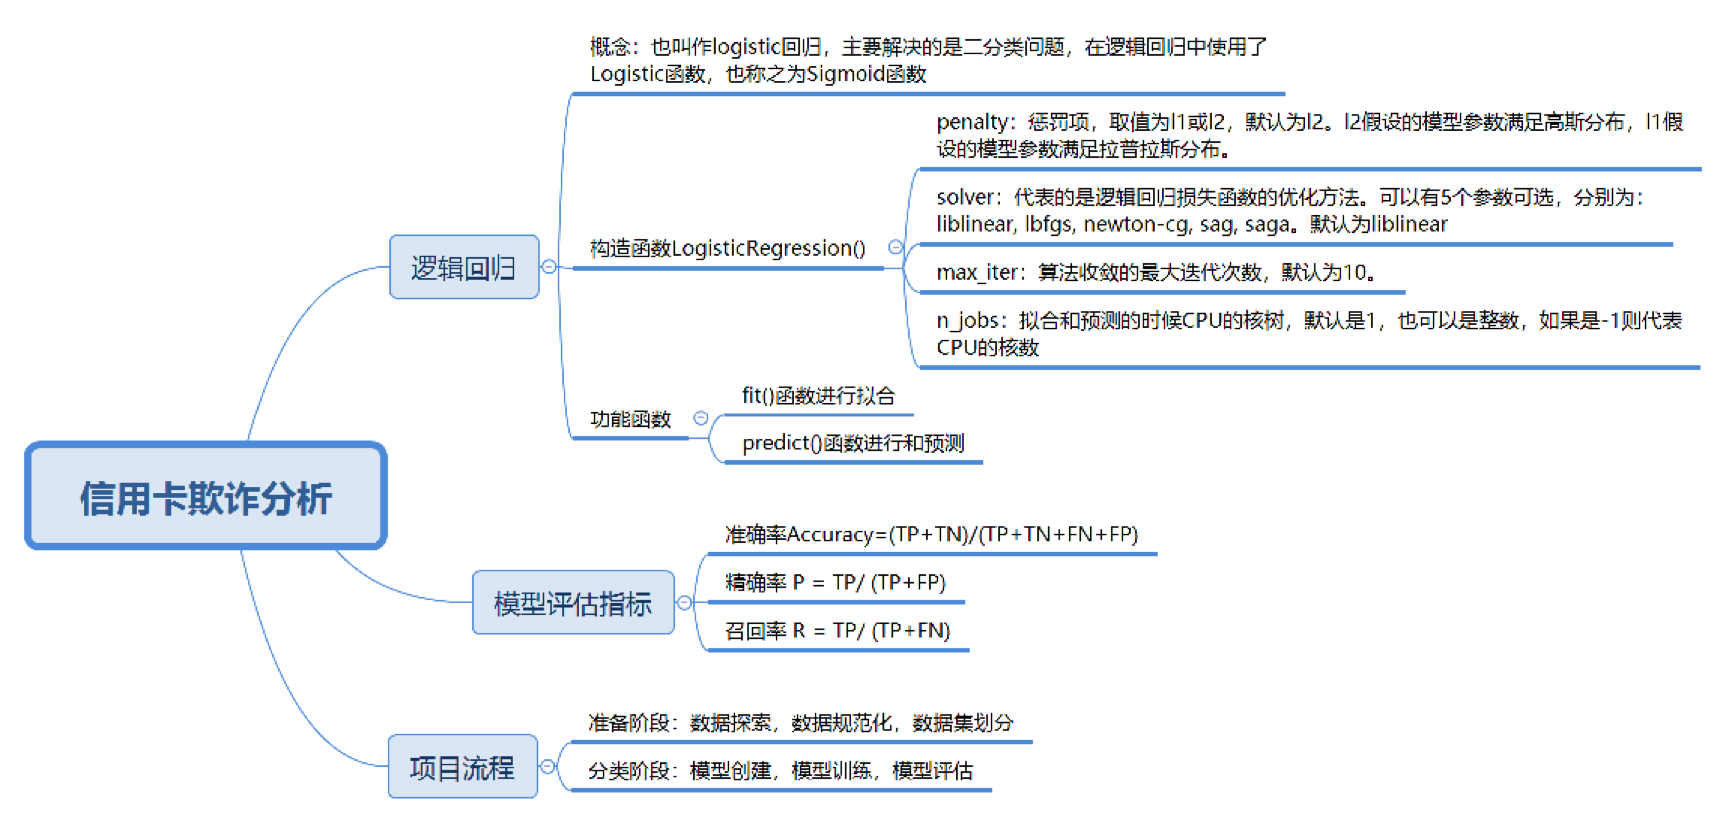

最后留两道思考题吧，今天我们对信用卡欺诈数据集进行了分析，它是一个不平衡数据集，你知道还有哪些数据属于不平衡数据么？另外，请你使用线性 SVM（对应 sklearn 中的 LinearSVC）对信用卡欺诈数据集进行分类，并计算精确率、召回率和 F1 值。

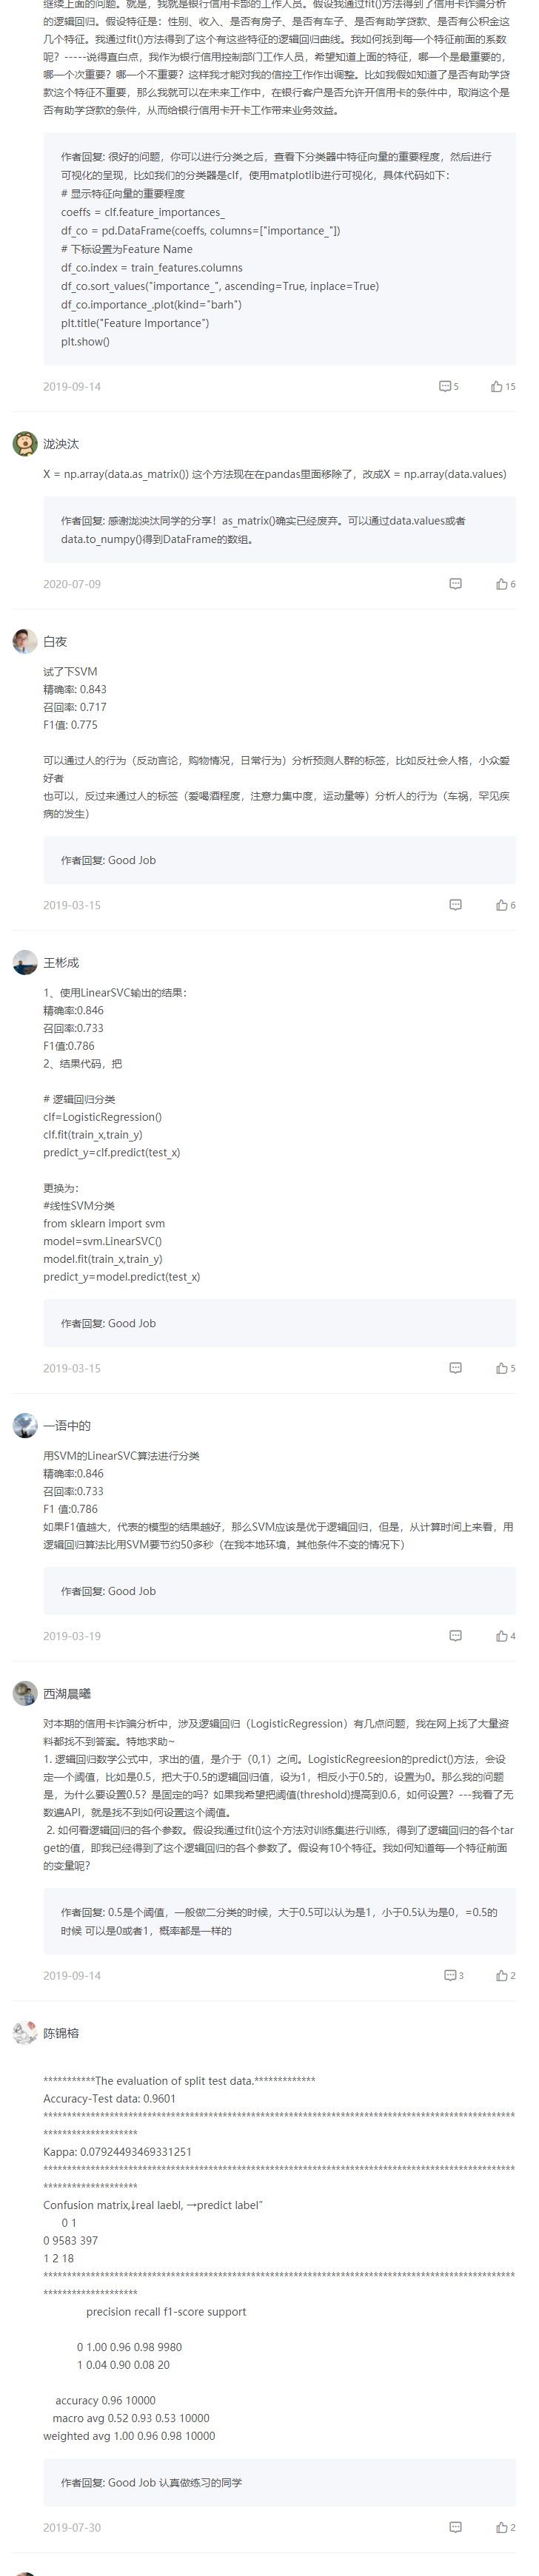